# Population Growth

Numerical code for the logistic model of population growth. The **logistic equation** is given by
$$ \dot{N} = rN\left(1 - \frac{N}{K}\right)$$

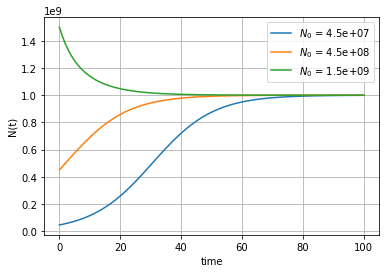

In [51]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# some chosen value for the "rate"
r = 1e-1

# some chosen balue for the "carrying capacity"
K = 1e9

# function that returns dN/dt
def logistic(n,t):
    dndt = r*n*(1 - n/K)
    return dndt

# initial conditions
N0 = [0.45*1e8, 0.45*1e9, 0.15*1e10]

# time points
t = np.array(np.linspace(0,1e2,100))

# plot results
for num in N0: # the for loop solves the ODE for the three different initial conditions in N0
    # solve ODE
    N = odeint(logistic,num,t)
    plt.plot(t,N,label='$N_0$ = {:.1e}'.format(num))
plt.xlabel('time')
plt.ylabel('N(t)')
plt.grid()
plt.legend()
plt.show()

Plotting $\dot{N}$ numerically from the above numpy array for $N(t)$

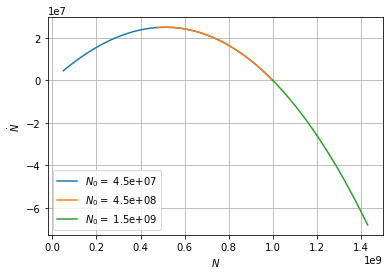

In [52]:
for num in N0:
    # solve ODE
    N = odeint(logistic,num,t)[:,0] # Look into the documentation of odeint to figure out the shape of the output.
                                    # This will explain the usage of [:,0] after the odeint command. 
                                    # Use print(np.shape(N)) (and also dNdt) to check the shape with and without the [:,0].
    dNdt = (N[1:]-N[:-1])/(t[1:]-t[:-1])
    plt.plot(N[1:],dNdt,label='$N_0 =$ {:.1e}'.format(num))
plt.xlabel(r'$N$')
plt.ylabel(r'$\dot{N}$')
plt.grid()
plt.legend()
plt.show()

Plotting the analytic form of $\dot{N}$:

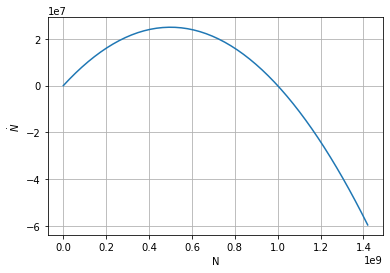

In [53]:
n = np.linspace(0, 1.42*1e9)
ndot = r*n*(1-n/K)
plt.plot(n,ndot)
plt.xlabel('N')
plt.ylabel(r'$\dot{N}$')
plt.grid()
plt.show()